In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
covid_data = "Resources/covid_19_clean_complete_03212020 - geo.csv"

covid_data = pd.read_csv(covid_data)


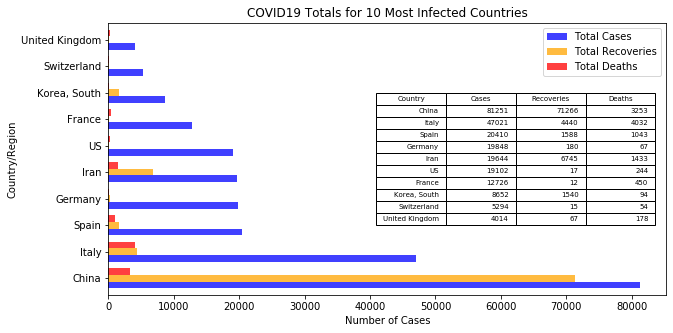

In [3]:
country_group = covid_data.groupby(["Country/Region"])
country_total_cases = country_group["Max of Confirmed"].sum()
country_total_deaths = country_group["Max of Deaths"].sum()
country_total_recovery = country_group["Max of Recovered"].sum()
country_death_rate = country_group["Death-Rate"].mean()

covid_total = covid_data["Max of Confirmed"].sum()
covid_dtotal = covid_data["Max of Deaths"].sum()

Merge_Corona_Totals = pd.DataFrame({"Total Cases": country_total_cases,
                                    "Total Recoveries": country_total_recovery, 
                                    "Total Deaths": country_total_deaths})

Merge_Corona_Totals = Merge_Corona_Totals.sort_values("Total Cases",ascending=False)
Merge_Corona_Totals = Merge_Corona_Totals.reset_index()


Top10_Corona_Totals = Merge_Corona_Totals.head(10)

Top10_Corona_Totals = Top10_Corona_Totals.reset_index()
Top10_Corona_Totals

bar_corona = Top10_Corona_Totals.plot(kind="barh", x="Country/Region", y=["Total Cases","Total Recoveries","Total Deaths"],
                                        width=.75, alpha=.75, align="center", figsize=(10,5), color=["blue","orange","red"])

bar_corona.table(cellText=Top10_Corona_Totals[["Country/Region","Total Cases","Total Recoveries","Total Deaths"]].values, 
                 colLabels=["Country","Cases","Recoveries","Deaths"],loc="center right")

corona_table = bar_corona.tables[0]
corona_table.set_fontsize(12)
corona_table.scale(.5,1)

plt.title("COVID19 Totals for 10 Most Infected Countries")
plt.xlabel("Number of Cases")
plt.savefig("images/CoronaCountryTotal.png")

In [19]:
Merge_Corona_Totals.to_csv("Resources/Corona3212020_data.csv", encoding="utf-8", index=False)


In [5]:
import gmaps
import json
import os
import gmaps.datasets
from config import gkey

gmaps.configure(api_key=gkey)

case_cities = covid_data[["Lat","Long"]]
cases = covid_data["Max of Confirmed"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(case_cities, weights=cases, 
                                 dissipating=False, max_intensity=10, point_radius=2)


fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [6]:
case_cities = covid_data[["Lat","Long"]]
deaths = covid_data["Max of Deaths"].astype(float)

fig_deaths = gmaps.figure()

heat_layer = gmaps.heatmap_layer(case_cities, weights=deaths, 
                                 dissipating=False, max_intensity=10, point_radius=2)


fig_deaths.add_layer(heat_layer)
fig_deaths

Figure(layout=FigureLayout(height='420px'))

In [7]:
Merge_Corona_Deaths = pd.DataFrame({"Total Deaths": country_total_deaths,"Death-Rate":country_death_rate})
Merge_Corona_Deaths = Merge_Corona_Deaths.sort_values("Total Deaths",ascending=False).head(10)
Merge_Corona_Deaths = Merge_Corona_Deaths.reset_index()
Merge_Corona_Deaths

,Country/Region,Total Deaths,Death-Rate
0,Italy,4032,0.090000
1,China,3253,0.012424
2,Iran,1433,0.070000
3,Spain,1043,0.050000
4,France,450,0.004444
5,US,244,0.011250
6,United Kingdom,178,0.052857
7,Netherlands,107,0.092500
8,"Korea, South",94,0.010000
9,Germany,67,0.000000


In [8]:
Merge_Corona_Deaths.to_csv("Resources/Corona3212020_datadeaths.csv", encoding="utf-8", index=False)

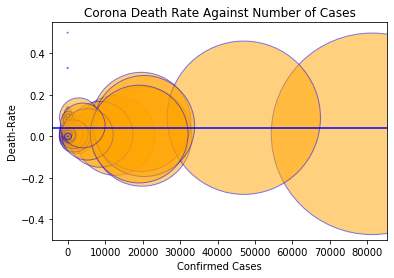

In [9]:
x_axis = country_total_cases
y_axis = country_death_rate

plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="blue", s=(x_axis/2), alpha=.5)
plt.title("Corona Death Rate Against Number of Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Death-Rate")
plt.axhline(y=(covid_dtotal/covid_total), color="blue", linestyle="-")
plt.savefig("Images/coronadeathratescatter.png")

In [10]:
SARS_data = "Resources/sars_clean_country_2003-complete_data-geo.csv"

SARS_data = pd.read_csv(SARS_data)


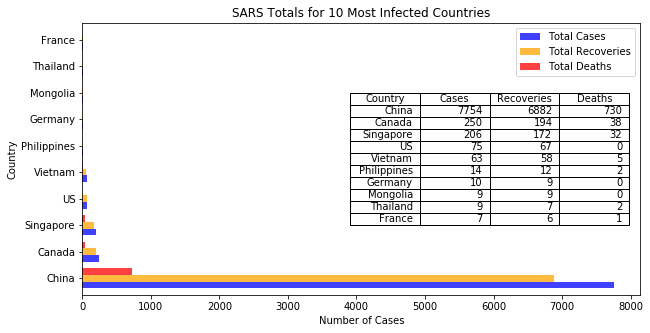

In [11]:
SARS_group = SARS_data.groupby(["Country"])
SARS_total_cases = SARS_group["Cumulative number of cases"].sum()
SARS_total_deaths = SARS_group["Number of deaths"].sum()
SARS_total_recovery = SARS_group["Number recovered"].sum()
SARS_death_rate = SARS_group["Death-Rate"].mean()

SARS_total = SARS_data["Cumulative number of cases"].sum()
SARS_dtotal = SARS_data["Number of deaths"].sum()

Merge_SARS_Totals = pd.DataFrame({"Total Cases": SARS_total_cases,
                                    "Total Recoveries": SARS_total_recovery, 
                                    "Total Deaths": SARS_total_deaths})

Merge_SARS_Totals = Merge_SARS_Totals.sort_values("Total Cases",ascending=False)
Merge_SARS_Totals = Merge_SARS_Totals.reset_index()


Top10_SARS_Totals = Merge_SARS_Totals.head(10)

Top10_SARS_Totals = Top10_SARS_Totals.reset_index()
Top10_SARS_Totals

bar_SARS = Top10_SARS_Totals.plot(kind="barh", x="Country", y=["Total Cases","Total Recoveries","Total Deaths"],
                                        width=.75, alpha=.75, align="center", figsize=(10,5), color=["blue","orange","red"])

bar_SARS.table(cellText=Top10_SARS_Totals[["Country","Total Cases","Total Recoveries","Total Deaths"]].values, 
                 colLabels=["Country","Cases","Recoveries","Deaths"],loc="center right")

SARS_table = bar_SARS.tables[0]
SARS_table.set_fontsize(12)
SARS_table.scale(.5,1)

plt.title("SARS Totals for 10 Most Infected Countries")
plt.xlabel("Number of Cases")
plt.savefig("images/SARSCountryTotal.png")

In [12]:
Merge_SARS_Totals.to_csv("Resources/SARStotal_data.csv", encoding="utf-8", index=False)

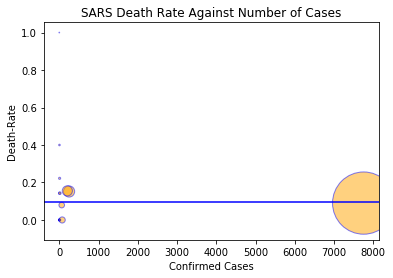

In [13]:
x_axis = SARS_total_cases
y_axis = SARS_death_rate

plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="blue", s=(x_axis/2), alpha=.5)
plt.title("SARS Death Rate Against Number of Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Death-Rate")
plt.axhline(y=(SARS_dtotal/SARS_total), color="blue", linestyle="-")
plt.savefig("Images/sarsdeathratescatter.png")

In [14]:
import gmaps
import json
import os
import gmaps.datasets
from config import gkey

gmaps.configure(api_key=gkey)

SARS_countries = SARS_data[["Lat","Long"]]
SARS_cases = SARS_data["Cumulative number of cases"].astype(float)

SARS_fig = gmaps.figure()

SARS_heat_layer = gmaps.heatmap_layer(SARS_countries, weights=SARS_cases, 
                                 dissipating=False, max_intensity=10, point_radius=2)


SARS_fig.add_layer(heat_layer)
SARS_fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
SARS_countries = SARS_data[["Lat","Long"]]
SARS_deaths = SARS_data["Number of deaths"].astype(float)

SARS_fig_deaths = gmaps.figure()

heat_layer = gmaps.heatmap_layer(SARS_countries, weights=SARS_deaths, 
                                 dissipating=False, max_intensity=10, point_radius=2)


SARS_fig_deaths.add_layer(heat_layer)
SARS_fig_deaths

Figure(layout=FigureLayout(height='420px'))

In [16]:
Merge_SARS_Deaths = pd.DataFrame({"Total Deaths": SARS_total_deaths,"Death-Rate":SARS_death_rate})
Merge_SARS_Deaths = Merge_SARS_Deaths.sort_values("Total Deaths",ascending=False).head(10)
Merge_SARS_Deaths = Merge_SARS_Deaths.reset_index()
Merge_SARS_Deaths

,Country,Total Deaths,Death-Rate
0,China,730,0.090079
1,Canada,38,0.152000
2,Singapore,32,0.155340
3,Vietnam,5,0.079365
4,Philippines,2,0.142857
5,Thailand,2,0.222222
6,Malaysia,2,0.400000
7,South Africa,1,1.000000
8,France,1,0.142857
9,Finland,0,0.000000


In [18]:
Merge_SARS_Deaths.to_csv("Resources/SARS_datadeaths.csv", encoding="utf-8", index=False)

In [20]:
combined_data = "Resources/Combined_data.csv"

combined_data = pd.read_csv(combined_data)

In [105]:
combined_group = combined_data.groupby(["Virus"])
virus_country_count = combined_group["Virus"].count()
virus_case_total = combined_group["Total Cases"].sum()
virus_recov_total = combined_group["Total Recoveries"].sum()
virus_death_total = combined_group["Total Deaths"].sum()
combined_DR = (virus_death_total/virus_case_total)
combined_RR = (virus_recov_total/virus_case_total)

summary_table = pd.DataFrame({"Total Countries": virus_country_count, 
                             "Total Cases": virus_case_total, 
                             "Total Recoveries":virus_recov_total, 
                             "Total Deaths": virus_death_total, 
                             "Death Rate": combined_DR, 
                             "Recovery Rate": combined_RR})

summary_table = summary_table.reset_index()

summary_table

,Virus,Total Countries,Total Cases,Total Recoveries,Total Deaths,Death Rate,Recovery Rate
0,COVID19,162,272177,87318,11305,0.041535,0.320813
1,SARS,34,8442,7452,813,0.096304,0.882729
